<a href="https://colab.research.google.com/github/Selvy-Sridar/GRIP-TASKS/blob/main/Grip_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION - GRIP - DATA SCIENCE AND BUSINESS ANALYTICS - JAN2022**

TASK 2: PREDICTION USING UNSUPERVISED LEARNING

AUTHOR: SELVY.S

DATASET USED: IRIS DATASET(Download: https://bit.ly/3kXTdox )

In [ ]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
#Loading the data
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Counting no of species
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

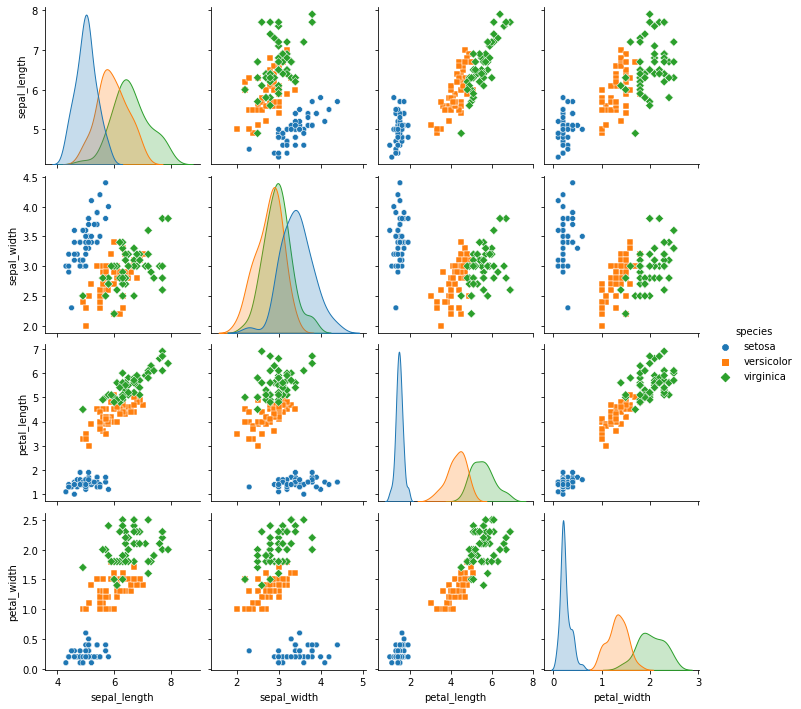

In [ ]:
#Having a look at our data through pair plot
sns.pairplot(df,hue='species',markers=["8","s","D"])

Using Elbow Method to estimate the value k:

In [ ]:
#At first, I assign the value of k as 5 and implementing k-means clustering using k=5
import sklearn
from sklearn.cluster import KMeans
Kmeans5=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=Kmeans5.fit_predict(df.drop('species',axis=1))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 4, 1, 1, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3,
       1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4], dtype=int32)

In [ ]:
#checking the centers for the 5 groups
Kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

In [ ]:
#Droping the target label species
df=df.drop('species',axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Adding a new target column for those 5 groups
df['Target']=y
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


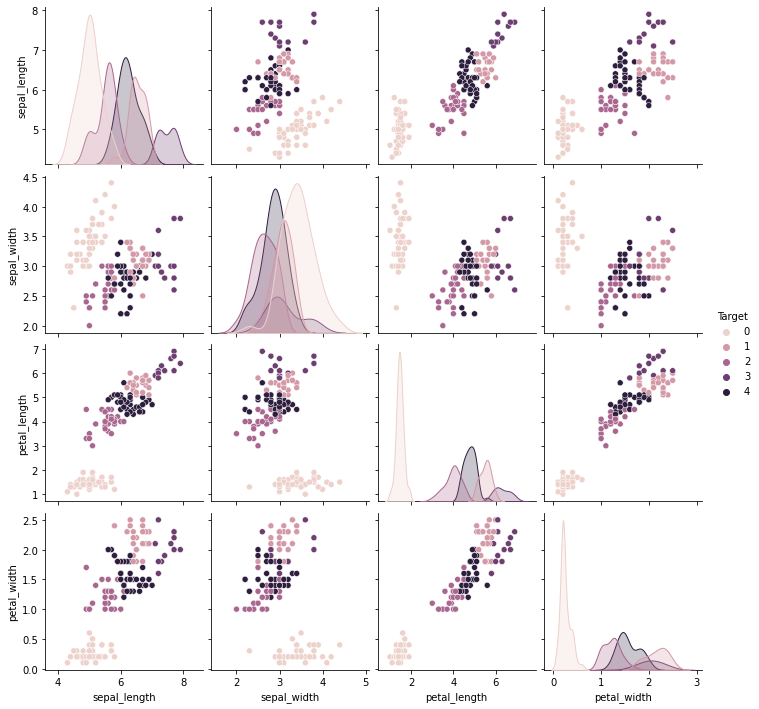

In [ ]:
#Again having a look at the data with the new target containing 5 groups
sns.pairplot(df,hue='Target')


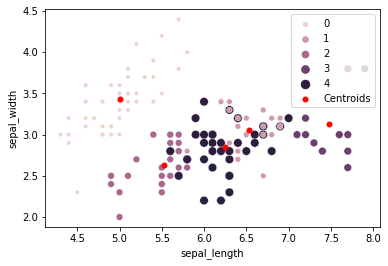

In [ ]:
#Plotting the center of the clusters
sns.scatterplot(data=df,x='sepal_length', y='sepal_width',hue='Target',size='Target')
plt.scatter(Kmeans5.cluster_centers_[:,0],Kmeans5.cluster_centers_[:,1],s=25,c='red',label='Centroids')
plt.legend()
plt.show()

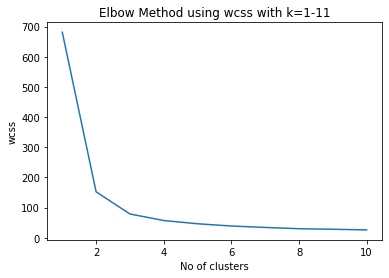

In [ ]:
#The output graph of the Elbow method is shown below. The Elbow is formed approximately at k=3
#wcss="Within Cluster Sum Of Squares"
wcss=[]
x=df.drop('Target',axis=1)
for i in range(1,11):
  Kmeans10=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(x)
  Kmeans10.fit(x)
  wcss.append(Kmeans10.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method using wcss with k=1-11')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Implementing k-means again using k=3
Kmeans3=KMeans(n_clusters=3,random_state=21)
z=Kmeans3.fit_predict(x)
z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#Checking the center for 3 groups
Kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
#Changing the target with new 3 groups
df['Target']=z
df 

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


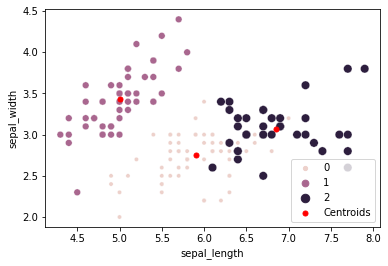

In [ ]:
#Finding the center for the 3 groups
sns.scatterplot(data=df,x='sepal_length', y='sepal_width',hue='Target',size='Target')
plt.scatter(Kmeans3.cluster_centers_[:,0],Kmeans3.cluster_centers_[:,1],s=25,c='red',label='Centroids')
plt.legend()
plt.show()